## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Importation du data set et visualisation

     price  surface  arrondissement
0     1820    46.10             1.0
1     1750    41.00             1.0
2     1900    55.00             1.0
3     1950    46.00             1.0
4     1950    49.00             1.0
..     ...      ...             ...
822    850    35.00            10.0
823    700    10.00            10.0
824   1280    34.00            10.0
825   1545    65.00            10.0
826   1000    21.43            10.0

[827 rows x 3 columns]


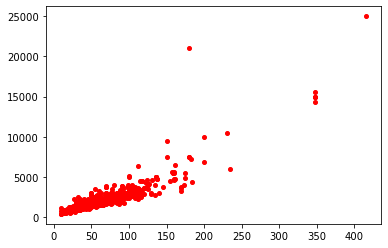

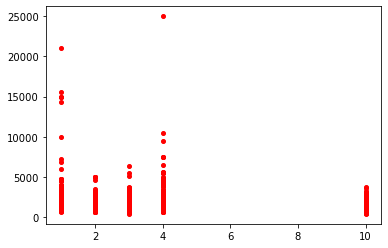

In [2]:
#Importation du data set
data=pd.read_csv('house_data.csv')
print(data)

#Visualisation
#Prix en fonction de la surface
plt.plot(data['surface'], data['price'],'ro', markersize=4)
plt.show()#On constate que les prix inférieurs à 15000 semblent varier de manière linéaire par rapport à la surface

#Prix en fonction de l'arrondissement
plt.plot(data['arrondissement'], data['price'],'ro', markersize=4)
plt.show()
#Les prix sont relativements similaires à chaque arrondissement avec quelques execptions dans les arrondissements 1 et 4
#On constate que l'arrondissement n'a pas d'impact immédiat surle prix, il permet de catégoriser le logement

## Exploration

###### L'arrondissiment sera utilisé comme colonne de catégorisation.
Pour rendre cela effectif, nous utiliserons l'algorithme du One hot encoding.
C'est-à-dire qu'à chaque ligne du data frame sera affectée un arrondissement.

In [3]:
arr=pd.get_dummies(data.arrondissement)
del data['arrondissement']
data1=data.join(arr)
print(data1)
print(data1.columns)

     price  surface  1.0  2.0  3.0  4.0  10.0
0     1820    46.10    1    0    0    0     0
1     1750    41.00    1    0    0    0     0
2     1900    55.00    1    0    0    0     0
3     1950    46.00    1    0    0    0     0
4     1950    49.00    1    0    0    0     0
..     ...      ...  ...  ...  ...  ...   ...
822    850    35.00    0    0    0    0     1
823    700    10.00    0    0    0    0     1
824   1280    34.00    0    0    0    0     1
825   1545    65.00    0    0    0    0     1
826   1000    21.43    0    0    0    0     1

[827 rows x 7 columns]
Index(['price', 'surface', 1.0, 2.0, 3.0, 4.0, 10.0], dtype='object')


## Modélisation
Comptenu de l'évolution linéaire du prix en fonction de la fonction de la surface,
nous utiliserons un algorithme de régression linéaire avec la surface et les arrondissements comme données d'entrée

In [10]:
#Nettoyage du data set
data2=data1[data1.price<=10000] #On ne concerve que les loyers dont le prix <= 10 000
data2.dropna(inplace=True)#Suppression des valeurs inutilisables
data2.rename(columns={1.0:'arr_1', 2.0:'arr_2', 3.0:'arr_3', 4.0:'arr_4', 10.0:'arr_10'}, inplace=True)#Renommage des colonnes
print(data2)

#Sélection de la variable d'entrée

X=data2[['surface','arr_1','arr_2','arr_3','arr_4','arr_10']]

#Sélection de la variable de sortie
Y=data2['price']

#Séparation du training set et du testing set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.8)

#Utilisation du modèle de regression linéaire
regr=linear_model.LinearRegression()
regr.fit(Xtrain,Ytrain)
print(Xtest)

#Prédictions
regrPredict=regr.predict(Xtest)

     price  surface  arr_1  arr_2  arr_3  arr_4  arr_10
0     1820    46.10      1      0      0      0       0
1     1750    41.00      1      0      0      0       0
2     1900    55.00      1      0      0      0       0
3     1950    46.00      1      0      0      0       0
4     1950    49.00      1      0      0      0       0
..     ...      ...    ...    ...    ...    ...     ...
822    850    35.00      0      0      0      0       1
823    700    10.00      0      0      0      0       1
824   1280    34.00      0      0      0      0       1
825   1545    65.00      0      0      0      0       1
826   1000    21.43      0      0      0      0       1

[814 rows x 7 columns]
     surface  arr_1  arr_2  arr_3  arr_4  arr_10
307    51.00      0      0      1      0       0
639    35.00      0      0      0      1       0
290    18.00      0      1      0      0       0
622    33.00      0      0      0      1       0
247    34.00      0      1      0      0       0
..       .

C:\Users\daoud\AppData\Local\Temp\ipykernel_7112\1293757087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace=True)#Suppression des valeurs inutilisables
C:\Users\daoud\AppData\Local\Temp\ipykernel_7112\1293757087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={1.0:'arr_1', 2.0:'arr_2', 3.0:'arr_3', 4.0:'arr_4', 10.0:'arr_10'}, inplace=True)#Renommage des colonnes


## Observation des prédictions par rapport à la réalité

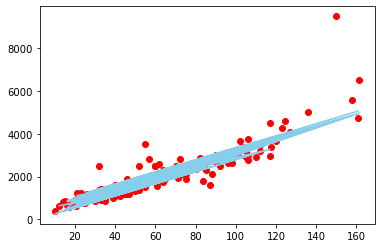

In [15]:
plt.plot(Xtest['surface'], Ytest, 'ro')
plt.plot(Xtest['surface'], regrPredict,color="skyblue")
plt.show()

## Calcul de l'erreur

In [20]:
score = 1-regr.score(Xtest, Ytest)
print(score)#Distance Euclidienne

#Calcul de l'erreur quadratique
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(regrPredict, Ytest)

print(score_bl)

0.17940895379018384
0.8205910462098162


#### Méthode2 : Travailler en utilisant la surface et l'arrondissement comme données d'entrées.